In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.patches as patches
import requests

In [9]:
def leer_matriz(nombre_archivo):
    matriz = []
    with open(nombre_archivo, 'r') as archivo:
        archivo.readline()
        archivo.readline()
        for linea in archivo:
            fila = [float(valor) for valor in linea.strip().split()]
            matriz.append(fila)
    return np.array(matriz)

In [10]:
nomenclatura = pd.read_csv('nomenclaturas/estaciones_ecobici.csv', encoding='latin1')
nomenclatura.head()

,sistema,id,calle_prin,calle_secu,colonia,alcaldia,latitud,longitud,sitio_de_e,estatus
0,Ecobici,100,20 de Noviembre,Mesones,Centro,Cuauhtemoc,19.428485,-99.133800,Banqueta,Instalada
1,Ecobici,102,Echeveste,Simon Bolivar,Centro,Cuauhtemoc,19.428214,-99.139494,Banqueta,Instalada
2,Ecobici,103,Joaquin Velazquez de Leon,Garcia Icazbalceta,San Rafael,Cuauhtemoc,19.441533,-99.165268,Arroyo,Instalada
3,Ecobici,104,San Jeronimo,Isabel la Catolica,Centro,Cuauhtemoc,19.427059,-99.137116,Banqueta,Instalada
4,Ecobici,105,San Jeronimo,5 de Febrero,Centro,Cuauhtemoc,19.426755,-99.135014,Arroyo,Instalada


In [11]:
datos_ubicacion = nomenclatura[['id', 'latitud', 'longitud']]
datos_ubicacion.head()

,id,latitud,longitud
0,100,19.428485,-99.133800
1,102,19.428214,-99.139494
2,103,19.441533,-99.165268
3,104,19.427059,-99.137116
4,105,19.426755,-99.135014


In [12]:
nan_values = datos_ubicacion.isna().sum()
print(nan_values)

id          0
latitud     0
longitud    0
dtype: int64


In [13]:
ubicaciones = {row['id']: [row['latitud'], row['longitud']] for _, row in datos_ubicacion.iterrows()}

El archivo Adj_mibici/matrices_2024/01_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/02_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/03_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/04_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/05_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/06_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/07_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/08_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/09_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/10_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/11_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/12_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/13_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/14_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/15_08_2024.txt no existe.
El archivo Adj_mibici/matrices_2024/16_08_2024.txt no existe.
El archi

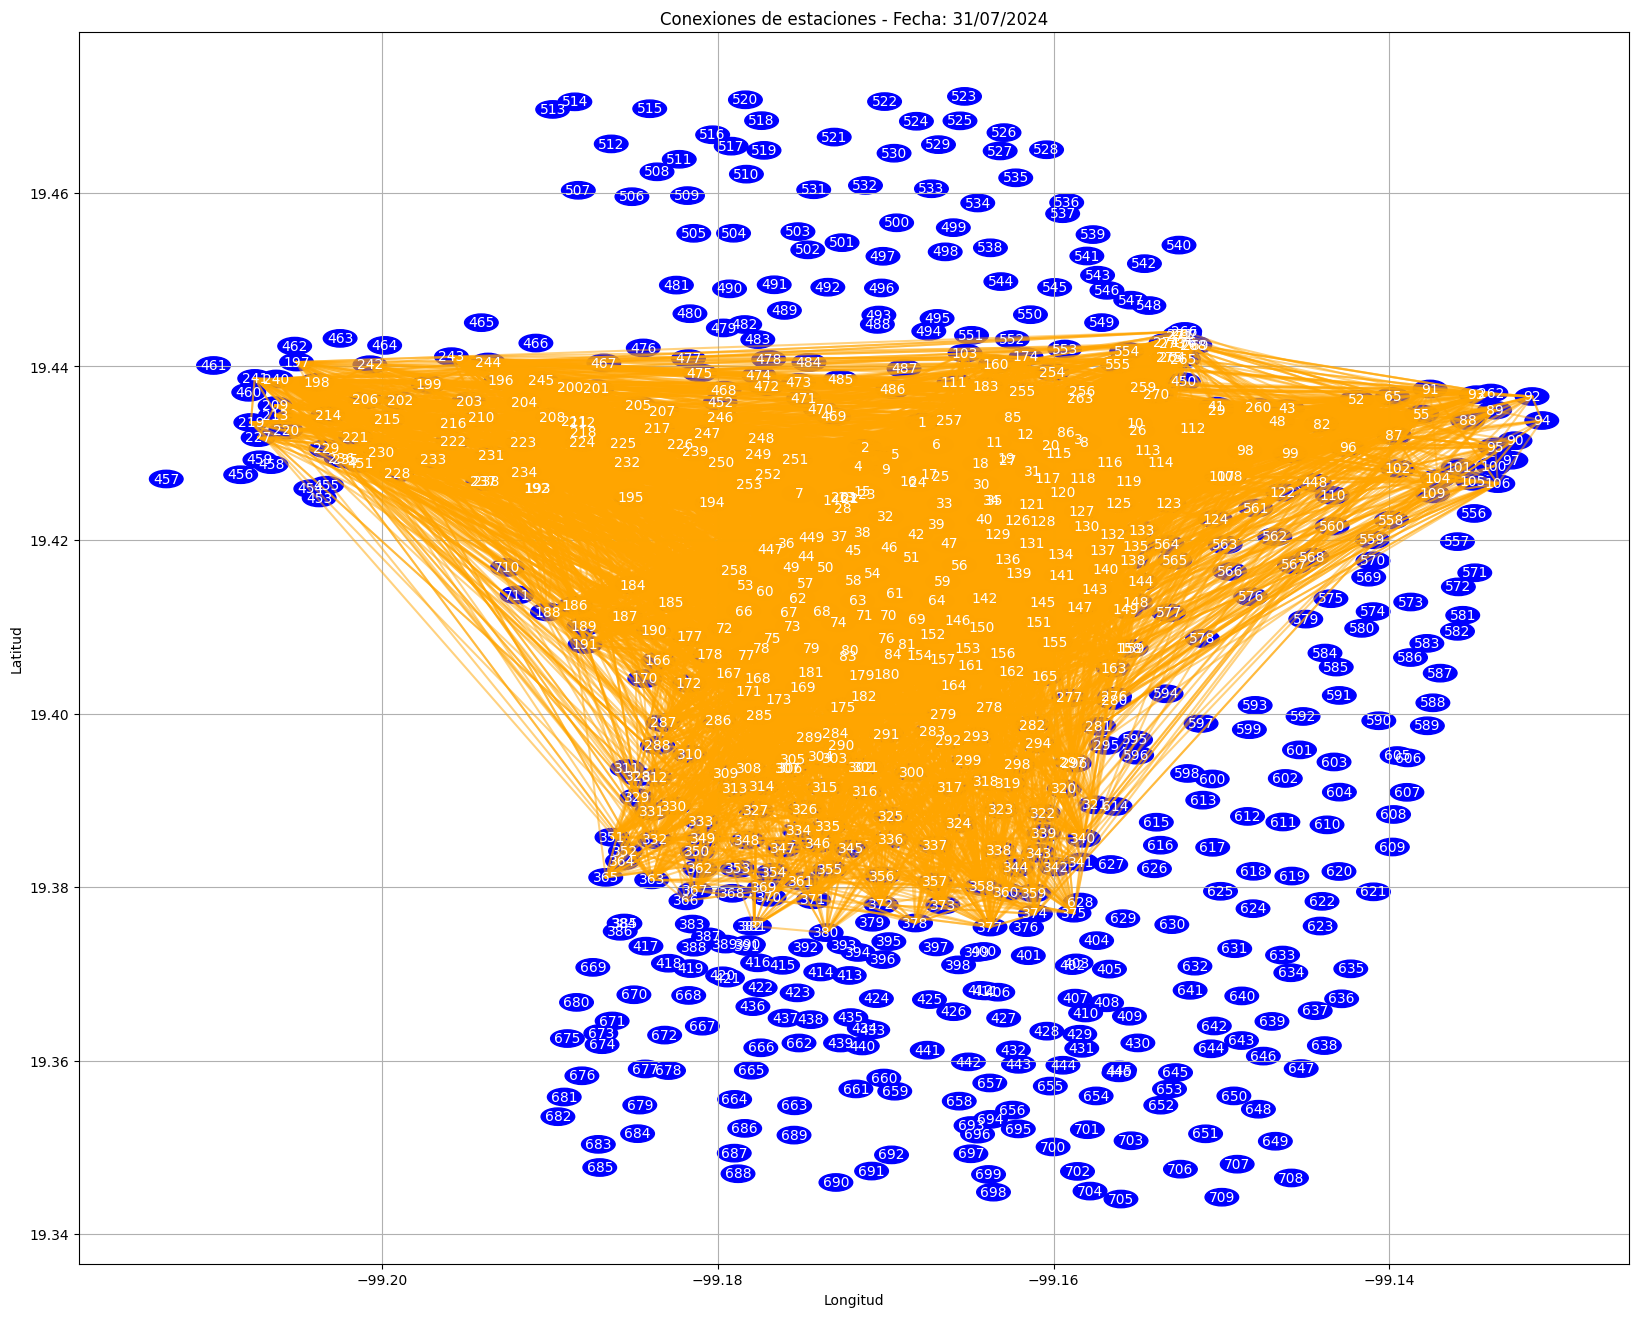

In [14]:
years = [2019, 2020, 2021, 2022, 2023, 2024]
# Lista para almacenar las matrices y las fechas correspondientes
matrices = []
dates = []
estaciones = []

# Iterar sobre cada año
for year in years:
    start_date = datetime(year, 1, 1) ##########################
    end_date = datetime(year, 12, 31)  #############################

    # Incremento de un día
    delta = timedelta(days=1)
    current_date = start_date

    estacion = leer_matriz(f'Adj_eco/matrices_estaciones/estaciones_{year}.txt')
    dict_estaciones = {i: estacion[i][0] for i in range(len(estacion))}
    estaciones.append(dict_estaciones)

    while current_date <= end_date:
        date_str = current_date.strftime('%d_%m_%Y')
        filename = f'Adj_mibici/matrices_{year}/{date_str}.txt'

        if os.path.exists(filename):
            matrix = leer_matriz(filename)
            matrices.append(matrix)
            dates.append(current_date)
        else:
            print(f"El archivo {filename} no existe.")
        current_date += delta

if not matrices:
    raise ValueError("No se encontraron matrices para generar la animación.")

# Crear la figura y definir los límites del plano (ajusta según las coordenadas de tus estaciones)
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlim(min([lon for _, (_, lon) in ubicaciones.items()]) - 0.01, max([lon for _, (_, lon) in ubicaciones.items()]) + 0.01)
ax.set_ylim(min([lat for _, (lat, _) in ubicaciones.items()]) - 0.01, max([lat for _, (lat, _) in ubicaciones.items()]) + 0.01)

# Función para actualizar el gráfico en cada frame
# Función para actualizar el gráfico en cada frame
def update(frame):
    ax.clear()
    
    # Establecer el título con la fecha correspondiente
    ax.set_title(f"Conexiones de estaciones - Fecha: {dates[frame].strftime('%d/%m/%Y')}")
    ax.grid()
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    year = dates[frame].year
    print('Procesando frame', frame, 'del año', year)
    for station_id, (lat, lon) in ubicaciones.items():
        # Dibujar la estación como un círculo
        circle = patches.Circle((lon, lat), 0.001, color='blue', fill=True)
        ax.add_patch(circle)
        # Añadir el ID de la estación dentro del círculo
        ax.text(lon, lat, str(int(station_id)), color='white', ha='center', va='center')

    # Recorrer la matriz de adyacencia del día para dibujar las conexiones
    matrix = matrices[frame]
    estacion = estaciones[year-2019] ########################################################3

    # Obtener los índices donde existe una conexión (valor mayor a 0 en la matriz)
    x, y = np.where(matrix > 0)

    for k in range(len(x)):
        # Obtener las coordenadas de inicio y fin de la conexión
        estacion_origen = estacion[x[k]]  # Estación de origen
        estacion_destino = estacion[y[k]]  # Estación de destino

        # Coordenadas (latitud, longitud) de las estaciones origen y destino
        p1 = ubicaciones[estacion_origen]
        p2 = ubicaciones[estacion_destino]

        # Graficar la línea que conecta las estaciones
        ax.plot([p1[1], p2[1]], [p1[0], p2[0]], color='orange', alpha=0.5)

    #fig.savefig(f'frames/frame_{frame}.png')
    return ax

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(matrices), interval=150)

# Guardar la animación como un archivo .mp4
ani.save("conexiones_ecobici_plano.mp4", writer="ffmpeg", codec='mpeg4')

# Mostrar el gráfico en tiempo real (opcional)
plt.show()

requests.post("https://ntfy.sh/Compu_CIMAT", data="Termino la simulación".encode(encoding='utf-8'))

del matrices
del dates
del estaciones